<a href="https://colab.research.google.com/github/sreejasomavarapu/Machine-Learning/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RIDGE REGRESSION**

In [ ]:
import numpy as np
import pandas as pd

In [47]:
dataset = pd.read_csv('Salary_Data.csv')

In [ ]:
dataset.head()

In [ ]:
dataset.shape

(99, 2)

In [49]:
X=dataset.iloc[:,:-1]
y =dataset.iloc[:,1]
#X = np.array(dataset['32.502345269453031'])
#y = np.array(dataset['31.70700584656992'])

In [62]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [51]:
X.shape

(30, 1)

In [ ]:
y.shape

(99,)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [54]:
ridge_regressor = Ridge(alpha=0.1)

In [66]:
params = {'alpha':[1,2,3,4,5,6,7,10,20,30,40,50,60,70]}
ridgecv = GridSearchCV(ridge_regressor, params, scoring = 'neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40, 50, 60,
                                   70]},
             scoring='neg_mean_squared_error')

In [67]:
ridgecv.best_params_

{'alpha': 1}

In [68]:
ridgecv.best_score_

-38198273.390130356

In [69]:
ridgecv.score(X_test,y_test)

-22570641.55639601

In [70]:
y_pred_ridge = ridgecv.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred_ridge)
r2score

0.977760519315693

**Visualizing Testing Data**

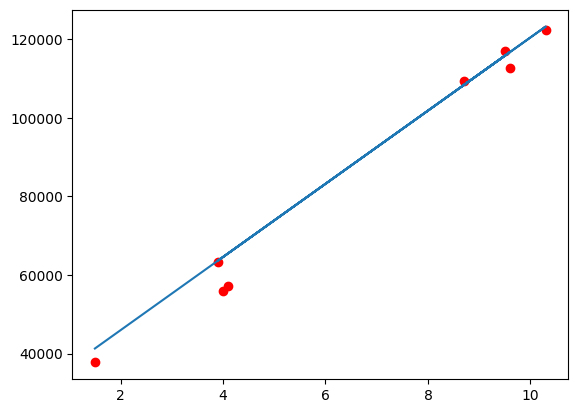

In [76]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,color='red')
#plt.plot((min(X),max(X)),(min(y_pred_ridge),max(y_pred_ridge)))
plt.plot(X_test,y_pred_ridge)
plt.show()


**Visualising Training Data**

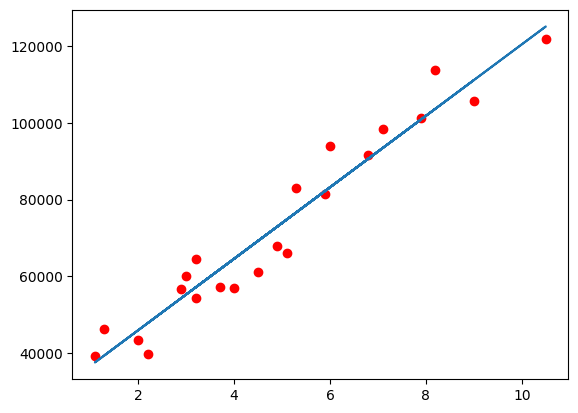

In [77]:
plt.scatter(X_train, y_train,color="red")
plt.plot(X_train, ridgecv.predict(X_train))
plt.show()

# **LASSO REGRESSION**

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [79]:
lasso = Lasso()

In [80]:
params = {'alpha':[0.1,0.5,1,2,3,4,5,6,7,10,15,20,40,50,100]}
lassocv = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)

In [83]:
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 10, 15, 20,
                                   40, 50, 100]},
             scoring='neg_mean_squared_error')

In [84]:
y_pred_lasso = lassocv.predict(X_test)

In [85]:
lassocv.best_params_

{'alpha': 0.1}

In [86]:
lassocv.best_score_

-38098845.915226094

In [87]:
r2_score(y_test,y_pred_lasso)

0.9779208090627941

**Visualizing Training Data**

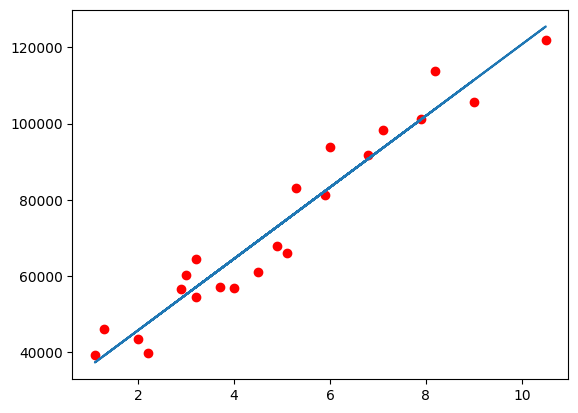

In [89]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, lassocv.predict(X_train))
plt.show()

**Visualizing Testing Data**

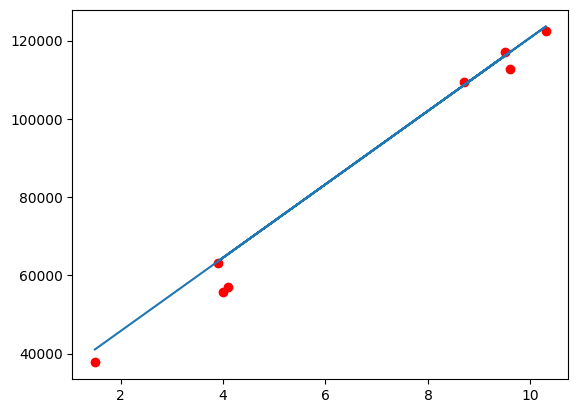

In [91]:
plt.scatter(X_test, y_test,color='red')
plt.plot(X_test, y_pred_lasso)
plt.show()